In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Ball By Ball Analysis/Bowling Analysis (Ball By Ball)/EDA/Bowling Performance Metrics (Ball By Ball).csv')

In [ ]:
df

,Team,Player,ES,WTS,BBI,CS,BWTS,SPS,DBI,EI,AVMS,BI
0,Annfield Plain CC Under 13,Daniel Carr,0.403846,0.134615,11.800000,3.000000,0.200000,1.000000,0.634615,0.833333,3.933333,0.000000
1,Annfield Plain CC Under 13,Hayden Jackman,0.477273,0.056818,13.285714,8.400000,0.142857,0.333333,0.727273,0.347222,1.581633,0.347222
2,Annfield Plain CC Under 13,J Liddle,0.584615,0.153846,14.000000,3.800000,0.200000,1.500000,0.538462,0.476190,3.684211,0.380952
3,Annfield Plain CC Under 13,James Bennett,0.707692,0.076923,12.166667,9.200000,0.000000,0.833333,0.553846,0.761905,1.322464,0.380952
4,Annfield Plain CC Under 13,Luke Boyle,1.000000,0.027778,13.000000,36.000000,0.000000,0.285714,0.583333,1.583333,0.361111,0.416667
...,...,...,...,...,...,...,...,...,...,...,...,...
303,Shotley Bridge CC Under 13,Daniel Garside,0.865385,0.076923,13.000000,11.250000,0.000000,0.800000,0.576923,1.547619,1.155556,0.238095
304,Shotley Bridge CC Under 13,Hannah Collingwood,1.183333,0.050000,17.000000,23.666667,0.250000,0.000000,0.466667,0.800000,0.718310,0.700000
305,Shotley Bridge CC Under 13,Joshua Holmes,0.783133,0.024096,17.333333,32.500000,0.000000,0.333333,0.650602,1.555556,0.533333,0.222222
306,Ushaw Moor CC Under 13,Mason Lee,0.614035,0.070175,10.166667,8.750000,0.000000,0.666667,0.614035,0.430108,1.161905,0.430108


In [ ]:
descriptive_stats = df.describe()
descriptive_stats.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Ball By Ball Analysis/Bowling Analysis (Ball By Ball)/EDA/Bowling Performance Metrics (Ball By Ball) - Descriptive Stats.csv')

In [ ]:
numeric_data = df.select_dtypes(include=['number'])
numeric_data

,ES,WTS,BBI,CS,BWTS,SPS,DBI,EI,AVMS,BI
0,0.403846,0.134615,11.800000,3.000000,0.200000,1.000000,0.634615,0.833333,3.933333,0.000000
1,0.477273,0.056818,13.285714,8.400000,0.142857,0.333333,0.727273,0.347222,1.581633,0.347222
2,0.584615,0.153846,14.000000,3.800000,0.200000,1.500000,0.538462,0.476190,3.684211,0.380952
3,0.707692,0.076923,12.166667,9.200000,0.000000,0.833333,0.553846,0.761905,1.322464,0.380952
4,1.000000,0.027778,13.000000,36.000000,0.000000,0.285714,0.583333,1.583333,0.361111,0.416667
...,...,...,...,...,...,...,...,...,...,...
303,0.865385,0.076923,13.000000,11.250000,0.000000,0.800000,0.576923,1.547619,1.155556,0.238095
304,1.183333,0.050000,17.000000,23.666667,0.250000,0.000000,0.466667,0.800000,0.718310,0.700000
305,0.783133,0.024096,17.333333,32.500000,0.000000,0.333333,0.650602,1.555556,0.533333,0.222222
306,0.614035,0.070175,10.166667,8.750000,0.000000,0.666667,0.614035,0.430108,1.161905,0.430108


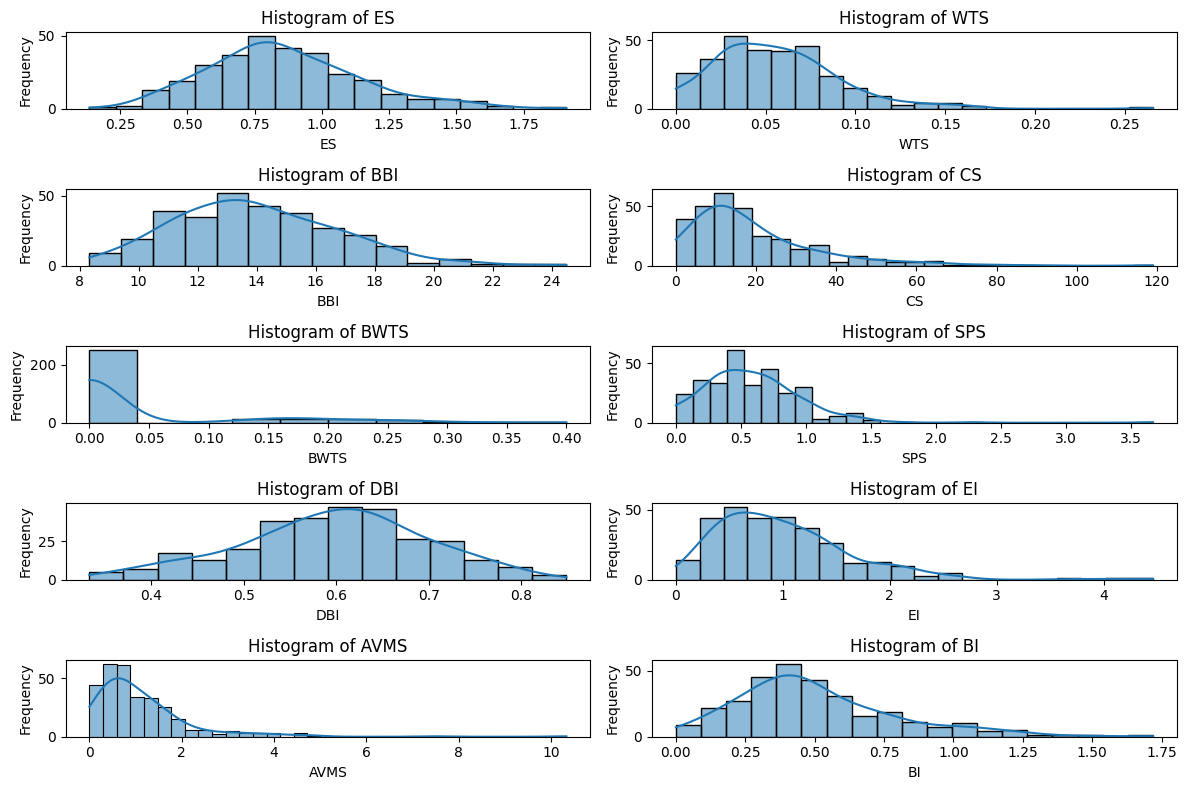

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

features = numeric_data.columns.tolist()

plt.figure(figsize=(12, 8))
for i, feature in enumerate(features,1):
  plt.subplot(5, 2, i)
  sns.histplot(df[feature], kde=True)
  plt.title(f'Histogram of {feature}')
  plt.xlabel(feature)
  plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

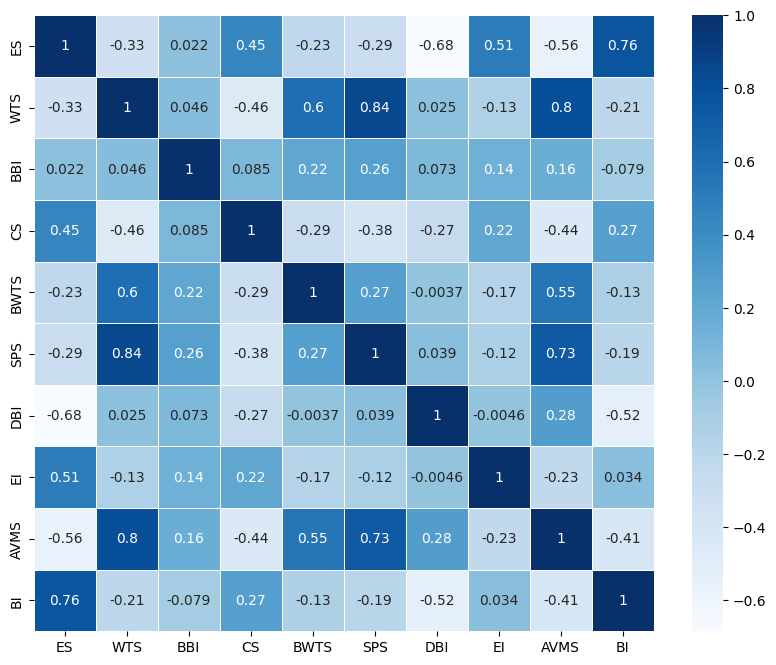

In [ ]:
corr_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', linewidths=0.5)
# plt.title('Correlation Matrix of Performance Metrics (Bowlers)', fontsize=14)
plt.show()

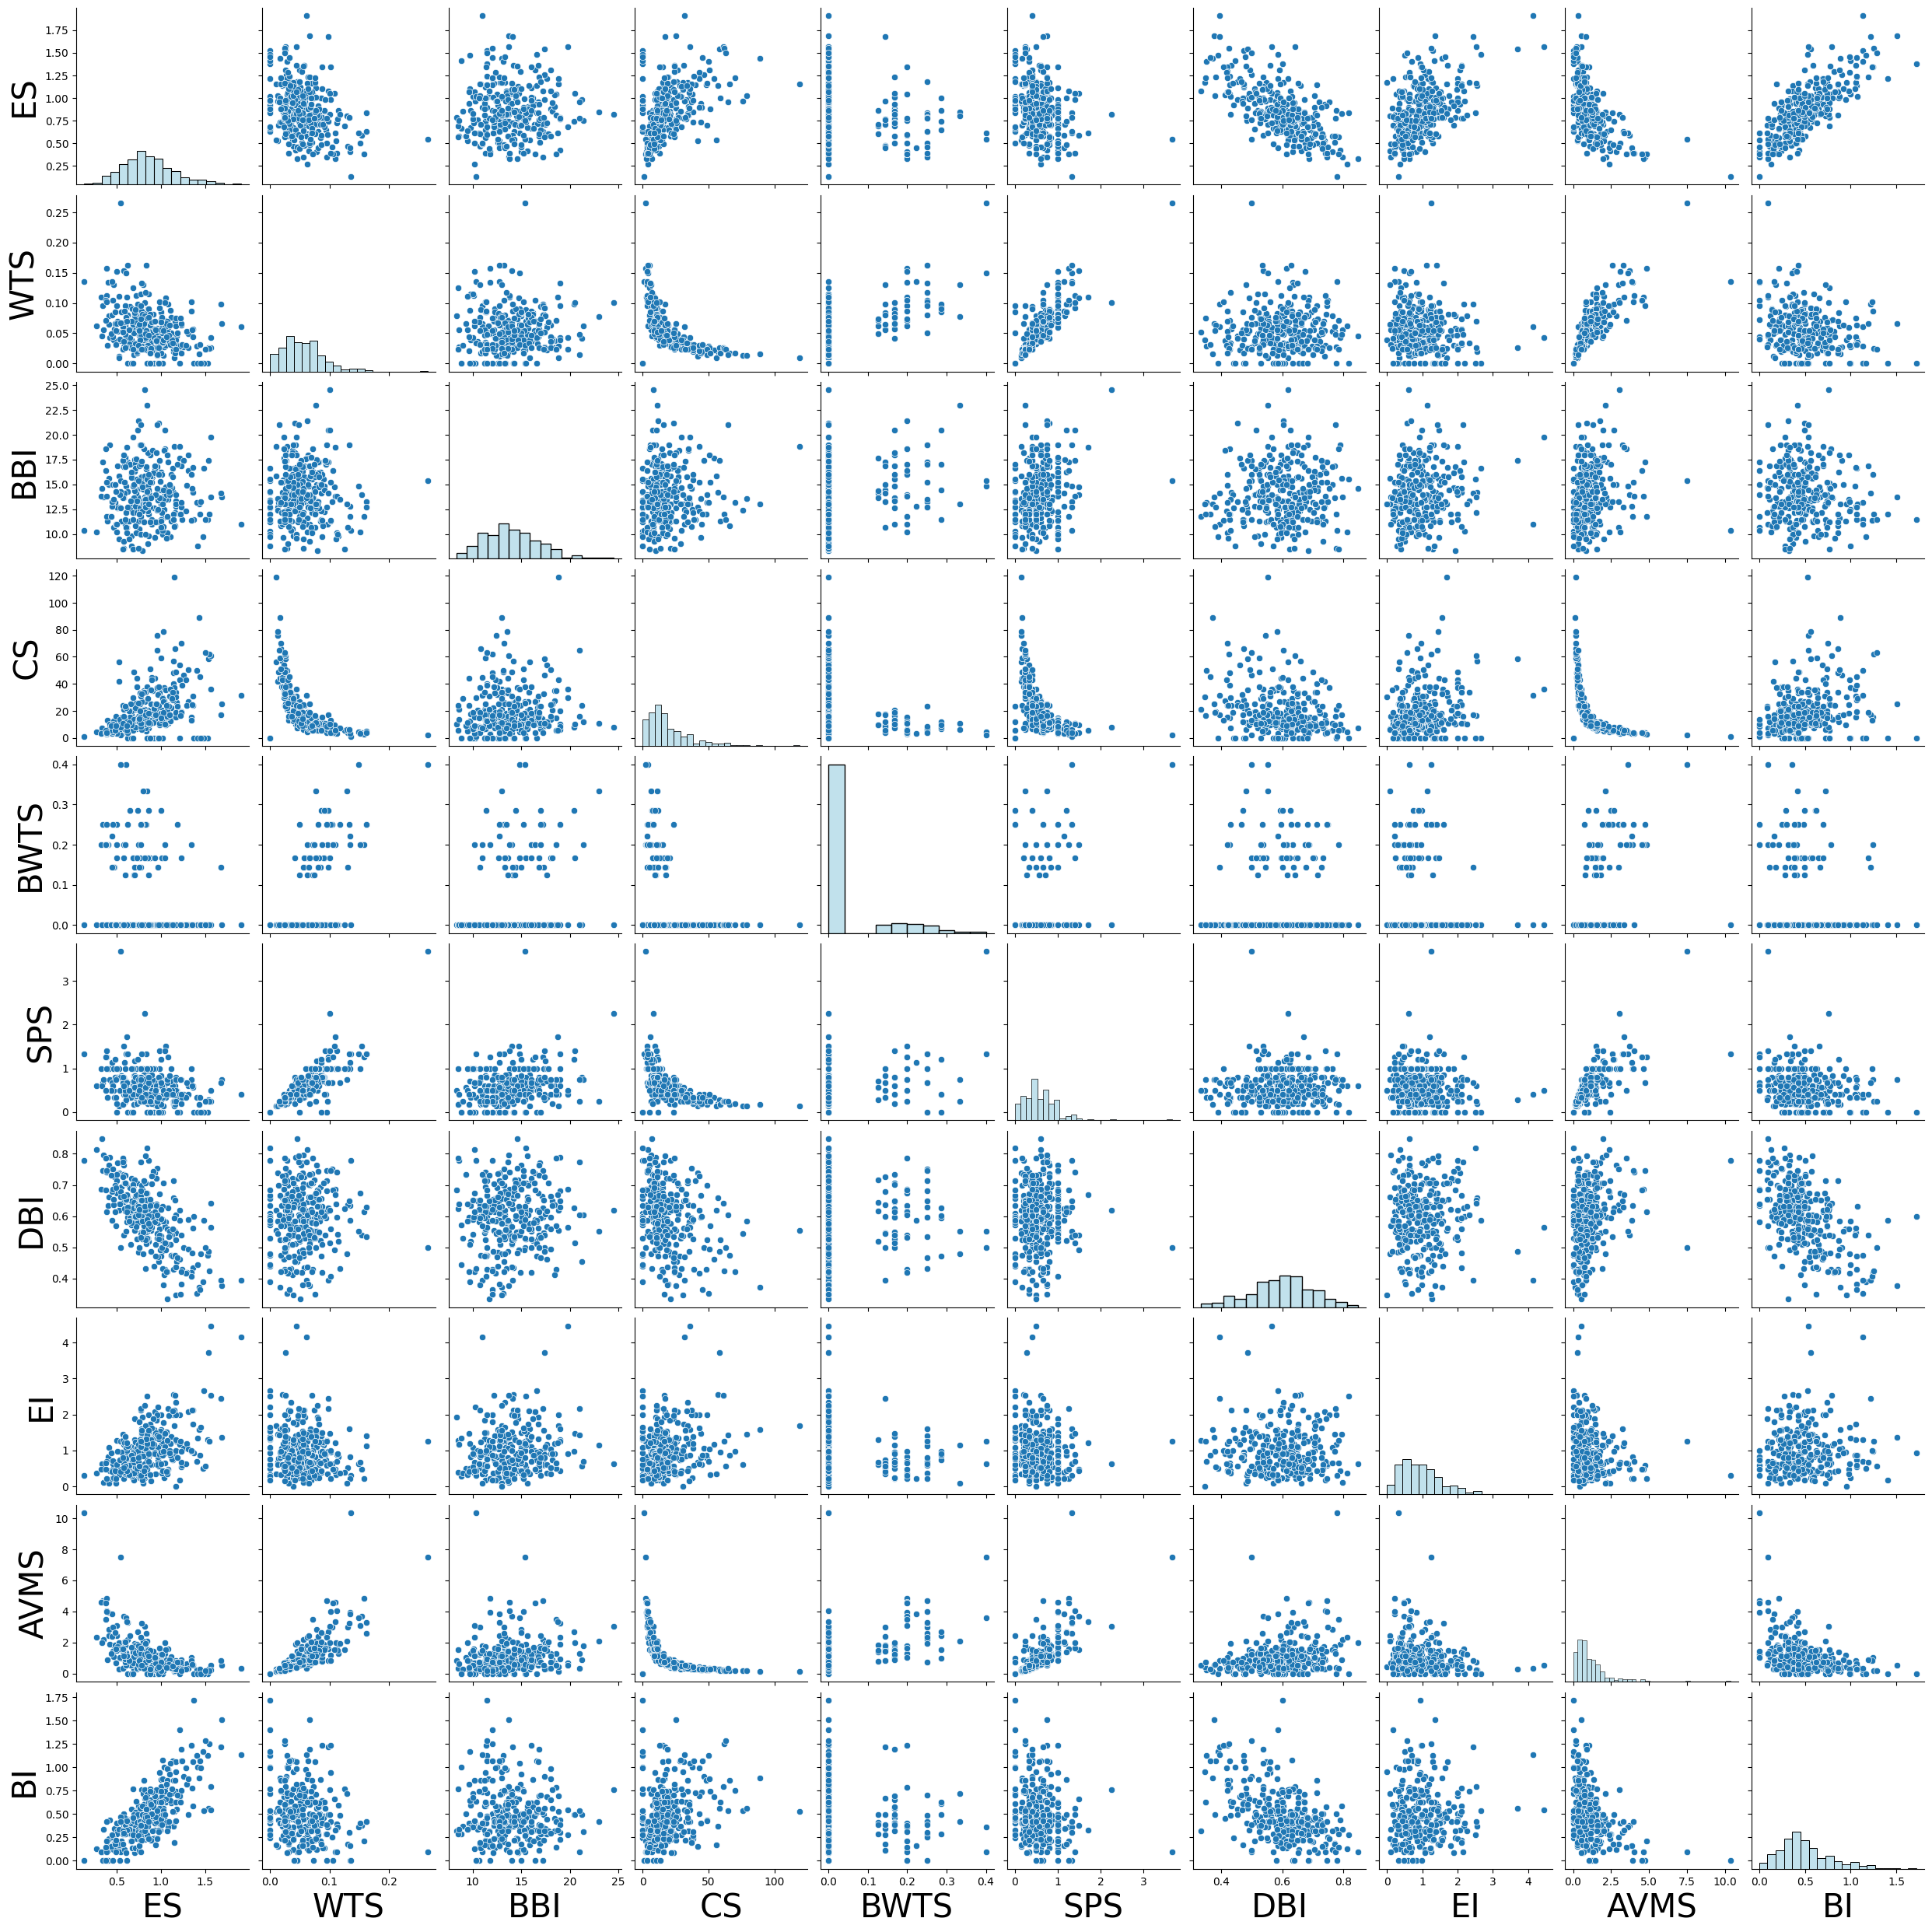

In [ ]:
sns.pairplot(numeric_data, diag_kws={'color': 'lightblue'})
for ax in plt.gcf().axes:
    ax.set_xlabel(ax.get_xlabel(), fontsize=30)
    ax.set_ylabel(ax.get_ylabel(), fontsize=30)
# plt.suptitle('Pairplot of Performance Metrics (Bowlers)', fontsize=16, y=1.02)
plt.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

transformed_data = np.log1p(numeric_data)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(transformed_data)
scaled_df = pd.DataFrame(scaled_data, columns=transformed_data.columns)
scaled_df

,ES,WTS,BBI,CS,BWTS,SPS,DBI,EI,AVMS,BI
0,0.225432,0.536129,0.314255,0.289566,0.541862,0.449966,0.623616,0.357107,0.657405,0.000000
1,0.279628,0.234595,0.423514,0.468034,0.396857,0.186753,0.792391,0.175594,0.390659,0.297994
2,0.354195,0.607476,0.472057,0.327649,0.541862,0.594822,0.438040,0.229455,0.636062,0.322718
3,0.433713,0.314595,0.342355,0.485095,0.000000,0.393481,0.468499,0.333694,0.347082,0.322718
4,0.601680,0.116311,0.403413,0.754240,0.000000,0.163144,0.526044,0.559154,0.126991,0.348247
...,...,...,...,...,...,...,...,...,...,...
303,0.527607,0.314595,0.403413,0.523348,0.000000,0.381569,0.513626,0.550953,0.316362,0.213537
304,0.694916,0.207119,0.653456,0.669547,0.663186,0.000000,0.291750,0.346297,0.222981,0.530537
305,0.479668,0.101078,0.671712,0.733483,0.000000,0.186753,0.653408,0.552785,0.176066,0.200636
306,0.373751,0.287913,0.178433,0.475670,0.000000,0.331609,0.584832,0.210770,0.317574,0.357688


In [ ]:
scaled_df.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Ball By Ball Analysis/Bowling Analysis (Ball By Ball)/EDA/Bowling Performance Metrics (Ball By Ball) - Scaled.csv', index=False)

In [ ]:
descriptive_stats_scaled = scaled_df.describe()
descriptive_stats_scaled.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Ball By Ball Analysis/Bowling Analysis (Ball By Ball)/EDA/Bowling Performance Metrics (Ball By Ball) - Scaled Descriptive Stats.csv')